In [34]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt


In [82]:
def forecast_var(x,y):
    forecast_y=[]
    future_x=[]
    x=x[-20:]
    y=y[-20:]
    slope, intercept, rvalue, pvalue, stderr= linregress(x,y)
    start_x=x[-1]
    start_y=y[-1]
    for j in range(2201-start_x):
        j+=1
        new_x=start_x+j
        new_y=slope*(new_x)+intercept
        forecast_y.append(new_y)
        future_x.append(new_x)
    return(future_x, forecast_y)

In [56]:
ent=pd.read_csv('Resources/ENT.csv')
del ent['Unnamed: 0']
ent.head()

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,GCAG,GISTEMP,population
0,1880,236,0,3,233,0,0,-0.1148,-0.20,2785160851
1,1881,243,0,4,239,0,0,-0.0628,-0.12,1374791585
2,1882,256,0,4,252,0,0,-0.0648,-0.10,1384400649
3,1883,272,0,3,269,0,0,-0.1424,-0.21,1394147464
4,1884,275,0,4,271,0,0,-0.2009,-0.28,1403721131


In [115]:
x=ent.Year.to_list()
y=ent.Total.to_list()

In [40]:
columns=ent.columns.to_list()
columns

['Unnamed: 0',
 'Year',
 'Total',
 'Gas Fuel',
 'Liquid Fuel',
 'Solid Fuel',
 'Cement',
 'Gas Flaring',
 'GCAG',
 'GISTEMP',
 'population']

In [41]:
for x in columns:
    print(x)

Unnamed: 0
Year
Total
Gas Fuel
Liquid Fuel
Solid Fuel
Cement
Gas Flaring
GCAG
GISTEMP
population


In [100]:
def forecast_df(df):
    columns=df.columns.to_list()
    proj_df=pd.DataFrame(columns=columns)
    for j in columns:
        if (j=='Year'):
            x=df.Year.to_list()
        else:
            y=df[f'{j}'].to_list()
            future_x, forecast_y=forecast_var(x,y)
            proj_df[f'{j}']=forecast_y
            proj_df['Year']=future_x
    return proj_df


In [101]:
proj_df=forecast_df(ent)

In [102]:
proj_df

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,GCAG,GISTEMP,population
0,2011,8985.084211,1676.152632,3214.210526,3609.568421,418.336842,66.994737,0.707542,0.725947,2.108937e+10
1,2012,9148.982707,1708.262406,3250.635338,3688.622556,432.830827,68.818045,0.726380,0.746466,2.133100e+10
2,2013,9312.881203,1740.372180,3287.060150,3767.676692,447.324812,70.641353,0.745219,0.766985,2.157264e+10
3,2014,9476.779699,1772.481955,3323.484962,3846.730827,461.818797,72.464662,0.764058,0.787504,2.181427e+10
4,2015,9640.678195,1804.591729,3359.909774,3925.784962,476.312782,74.287970,0.782896,0.808023,2.205590e+10
...,...,...,...,...,...,...,...,...,...,...
186,2197,39470.204511,7648.570677,9989.225564,18313.637594,3114.218045,406.130075,4.211544,4.542444,6.603324e+10
187,2198,39634.103008,7680.680451,10025.650376,18392.691729,3128.712030,407.953383,4.230383,4.562962,6.627487e+10
188,2199,39798.001504,7712.790226,10062.075188,18471.745865,3143.206015,409.776692,4.249221,4.583481,6.651651e+10
189,2200,39961.900000,7744.900000,10098.500000,18550.800000,3157.700000,411.600000,4.268060,4.604000,6.675814e+10


In [121]:
def forecast_change(x,y):
    forecast_y=[]
    future_x=[]
    x=x[-20:]
    y=y[-20:]
    slope, intercept, rvalue, pvalue, stderr= linregress(x,y)
    start_x=x[-1]
    start_y=y[-1]
    for j in range(2201-start_x):
        j+=1
        slope=slope*.9995
        print(slope)
        new_x=start_x+j
        new_y=slope*(new_x)+intercept
        forecast_y.append(new_y)
        future_x.append(new_x)
    return(future_x, forecast_y)

In [122]:
future_x, forecast_y=forecast_change(x,y)

163.81654699248122
163.734638718985
163.65277139962552
163.57094501392572
163.48915954141876
163.40741496164804
163.32571125416723
163.24404839854014
163.1624263743409
163.08084516115375
162.9993047385732
162.9178050862039
162.83634618366082
162.754928010569
162.67355054656372
162.59221377129043
162.5109176644048
162.42966220557258
162.3484473744698
162.2672731507826
162.1861395142072
162.10504644445012
162.0239939212279
161.94298192426731
161.8620104333052
161.78107942808853
161.7001888883745
161.61933879393032
161.53852912453337
161.4577598599711
161.37703098004113
161.29634246455112
161.21569429331885
161.1350864461722
161.05451890294913
160.97399164349767
160.89350464767594
160.8130578953521
160.73265136640444
160.65228504072124
160.57195889820088
160.4916729187518
160.41142708229242
160.33122136875127
160.2510557580669
160.17093023018788
160.0908447650728
160.01079934269026
159.93079394301893
159.85082854604744
159.77090313177442
159.69101768020855
159.61117217136845
159.531366585

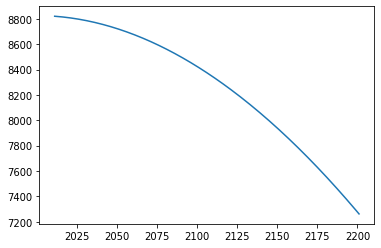

In [123]:
plt.plot(future_x, forecast_y)